# ESDU 03.06.17

FLEXIBLE CIRCULAR FRAMES SUPPORTING A SHELL.
THE EFFECT OF ADJACENT FRAMES AND THE LONGITUDINAL FLEXIBILITY
OF THE SHELL

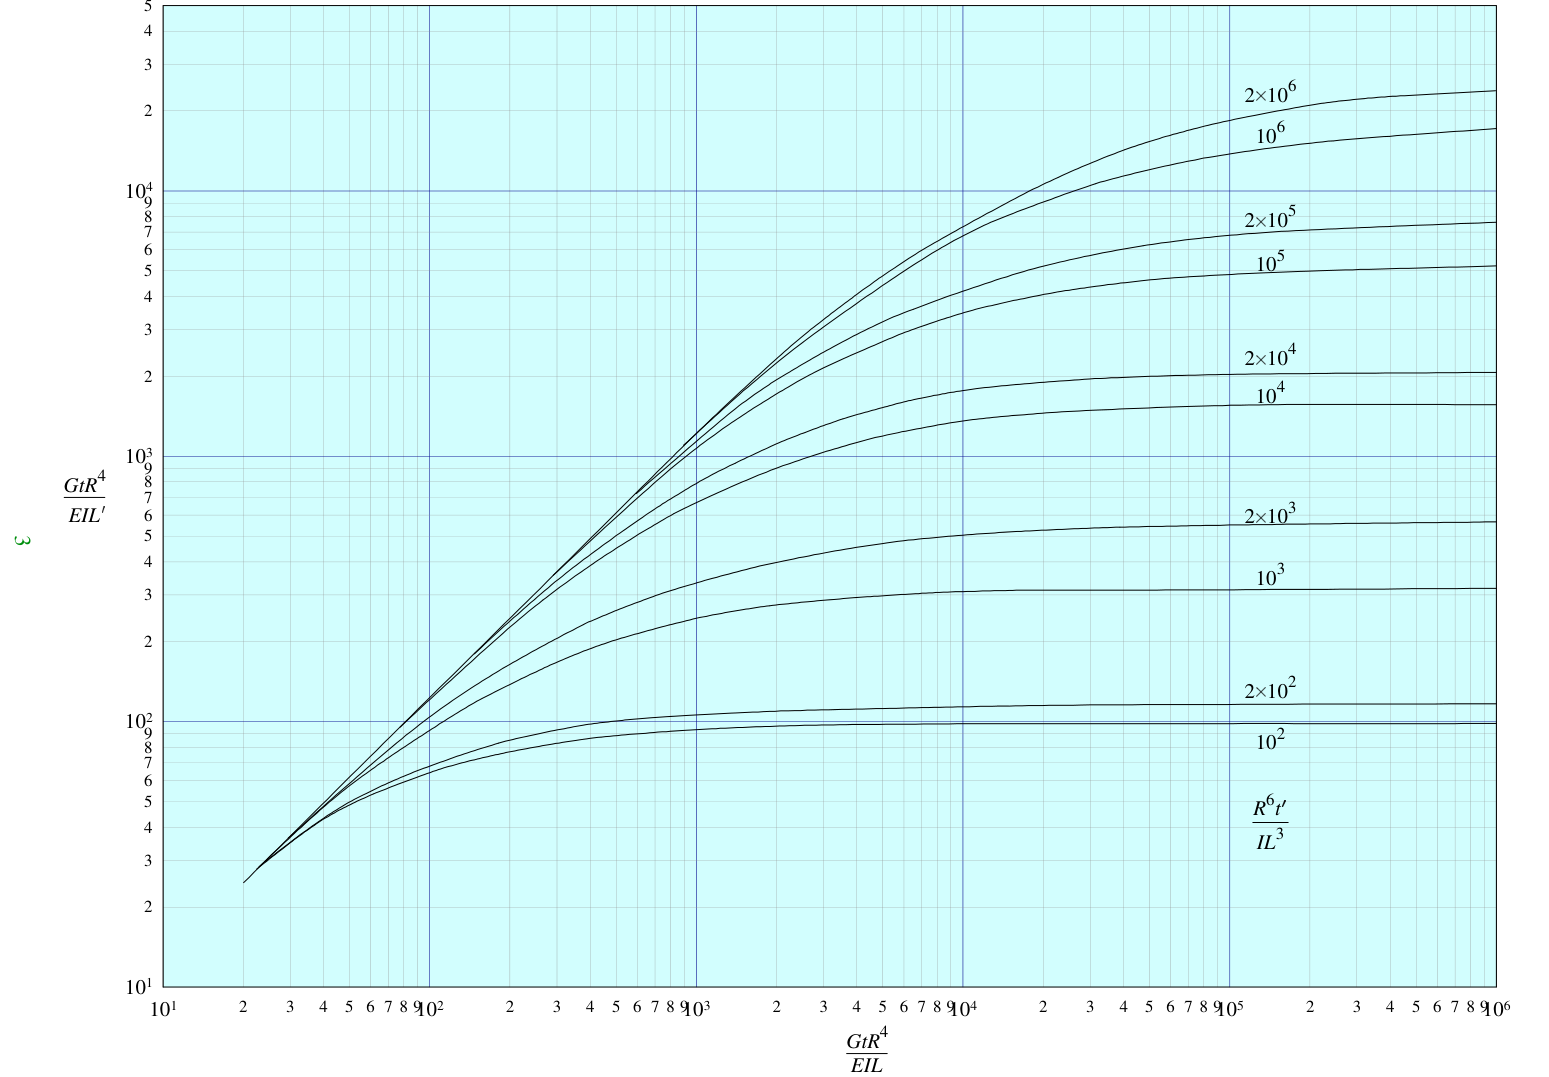

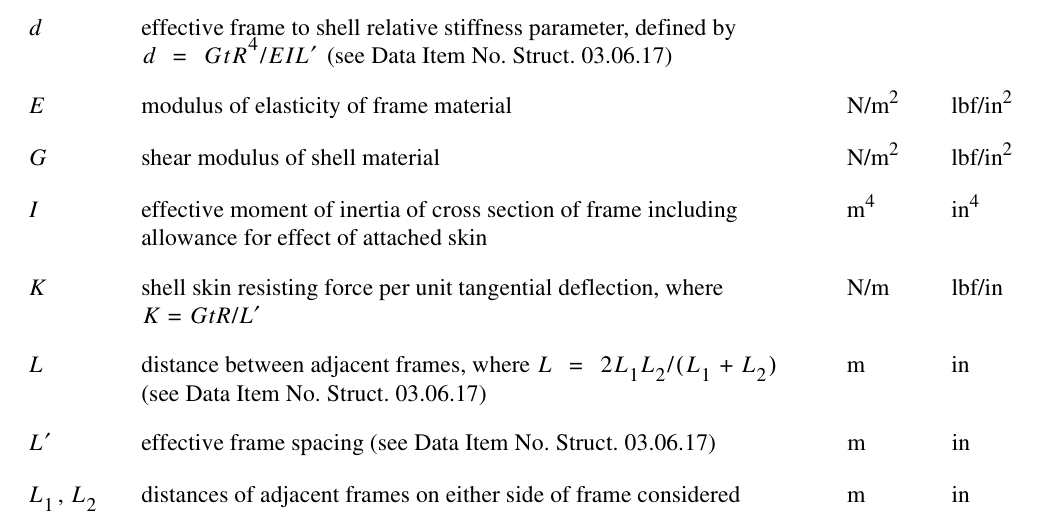

In [ ]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("c:/Users/oliver/projects/aerostructures/src/aerostructures/")
from esdu030617 import interpolators, CURVES

## Compare original data and interpolated curves

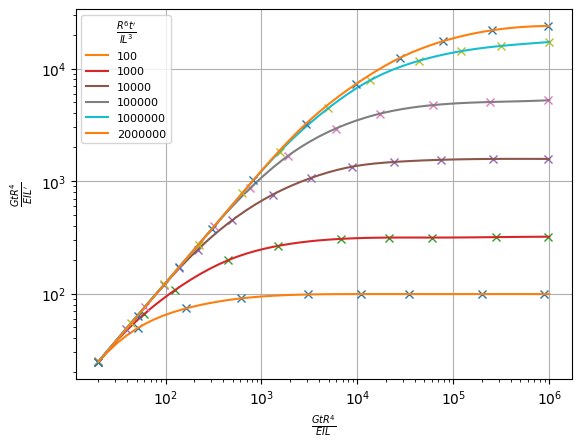

In [12]:
fig, ax = plt.subplots()
xl = np.linspace(1.3, 6)
x = 10**xl

for p, func in interpolators.items():
    ax.plot(10**CURVES[p][0], 10**CURVES[p][1], "x")
    ax.plot(x, 10**func(xl), label=f"{p:.0f}")

ax.set_xlabel("$\\frac{GtR^4}{EIL}$")
ax.set_ylabel("$\\frac{GtR^4}{EIL'}$")
ax.legend(title="$\\frac{R^6t'}{IL^3}$", fontsize=8)
ax.loglog()
ax.grid()

## Interpolate between curves

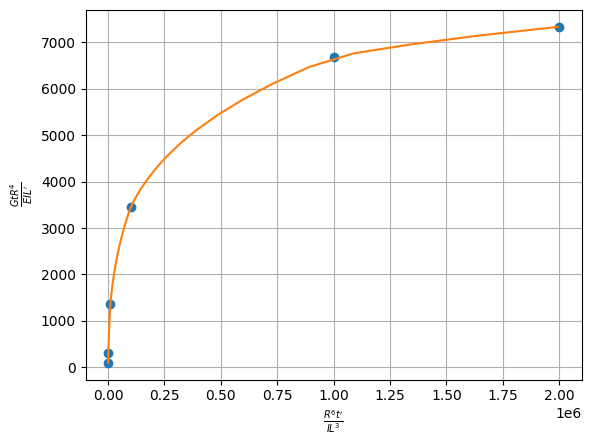

In [42]:
fig, ax = plt.subplots()

d0 = 9789   # arbitrary valie

# curve parameter values
xi = np.array(list(interpolators.keys()))  # x: R^6t'/ ...
xilog = np.log10(xi)

# the values of the curves, at constant parameter values
yilog = np.array([func(np.log10(d0)) for func in interpolators.values()])
yi = 10**yilog
ax.plot(xi, yi, "o")

# whole range of values for R^6...
xlog = np.linspace(2, 6.3)
# interpolate oin log space
ylog = np.interp(xlog, xilog, yilog)
ax.plot(10**xlog, 10**ylog);

ax.set_xlabel("$\\frac{R^6t'}{IL^3}$")
ax.set_ylabel("$\\frac{GtR^4}{EIL'}$")

ax.grid();
